In [1]:
import pandas as pd

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
%matplotlib inline

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

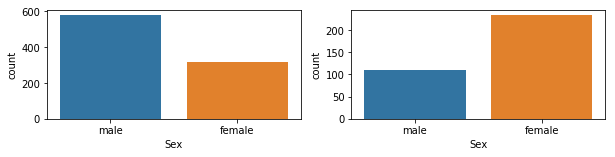

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2))

order = ['male', 'female']

sns.countplot(train['Sex'], ax=ax[0], order=order)
sns.countplot(train[train['Survived'] == 1]['Sex'], ax=ax[1], order=order)
#train[train['Survived'] == 1]['Sex'].value_counts().plot(kind='bar')

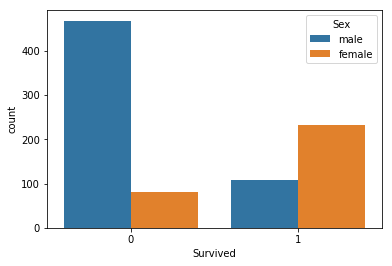

In [30]:
sns.countplot(data=train, x='Survived', hue='Sex')

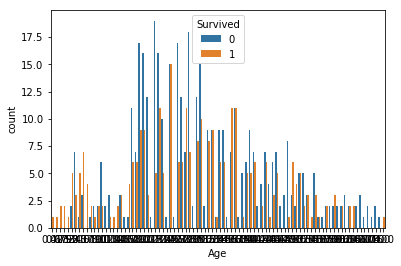

In [32]:
sns.countplot(data=train, x='Age', hue='Survived')

In [37]:
train['Age'] = train['Age'].apply(lambda x: 0 if x <= 15 else x)

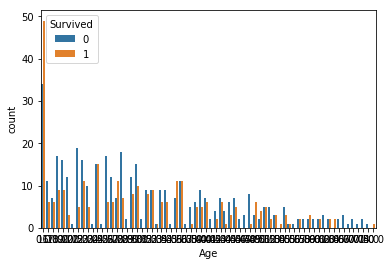

In [38]:
sns.countplot(data=train, x='Age', hue='Survived')

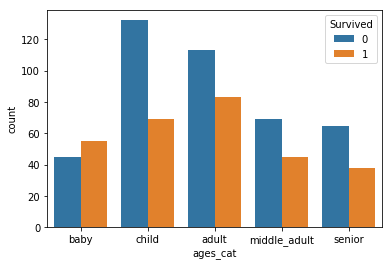

In [42]:
bins = [-1, 16, 25, 35, 45, 150]
labels = ['baby', 'child', 'adult', 'middle_adult', 'senior']

train['ages_cat'] = pd.cut(train['Age'], bins, labels=labels)
sns.countplot(data=train, x='ages_cat', hue='Survived')

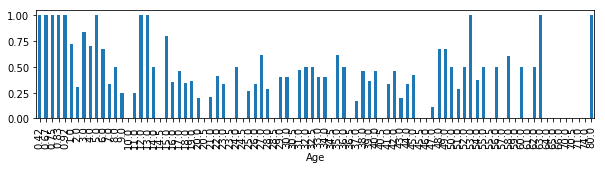

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
average_age = train.groupby('Age')['Survived'].mean().plot(kind='bar')

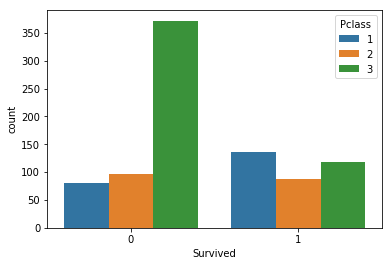

In [56]:
sns.countplot(data=train, x='Survived', hue='Pclass')

In [58]:
x = pd.get_dummies(train['Sex'])

In [59]:
x['child'] = (train['Age'] <= 16).astype(int)

In [64]:
x = pd.concat([x, pd.get_dummies(train['Pclass'])], axis=1)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression().fit(x, train['Survived'])

/Users/christophe.blefari/.virtualenvs/lab/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
(model.predict(x) == train['Survived']).sum() / len(train)

0.7901234567901234

In [71]:
x_test = pd.get_dummies(test['Sex'])
x_test['child'] = (test['Age'] <= 16).astype(int)
x_test = pd.concat([x_test, pd.get_dummies(test['Pclass'])], axis=1)

In [78]:
test['Survived'] = pd.DataFrame(model.predict(x_test))

In [79]:
test[['PassengerId', 'Survived']].to_csv('prediction.csv', index=False)